In [7]:
import pandas as pd

ratings = pd.read_csv(r"C:\Users\Mayo\Downloads\ml-latest-small\ml-latest-small\ratings.csv")
links = pd.read_csv(r"C:\Users\Mayo\Downloads\ml-latest-small\ml-latest-small\links.csv")
tags = pd.read_csv(r"C:\Users\Mayo\Downloads\ml-latest-small\ml-latest-small\tags.csv")
movies = pd.read_csv(r"C:\Users\Mayo\Downloads\ml-latest-small\ml-latest-small\movies.csv")
links.info()
tags.info()
movies.info()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   g

In [10]:
duplicate_count = merged_df.duplicated().sum()
duplicate_count

np.int64(0)

In [11]:
missing_values = merged_df.isnull().sum()
missing_values

movieId                 0
title                   0
genres                  0
userId_rating          21
rating                 21
timestamp_rating       21
userId_tag          52549
tag                 52549
timestamp_tag       52549
imdbId                  0
tmdbId                 13
dtype: int64

In [9]:
merged_df = pd.merge(movies, ratings, on="movieId", how = "left")
merged_df = pd.merge(merged_df, tags, on="movieId", how="left", suffixes=('_rating', '_tag'))
merged_df = pd.merge(merged_df, links, on = "movieId", how = "left")
merged_df.head()

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,336.0,pixar,1.139046e+09,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,474.0,pixar,1.137207e+09,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,567.0,fun,1.525286e+09,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,847434962.0,336.0,pixar,1.139046e+09,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,847434962.0,474.0,pixar,1.137207e+09,114709,862.0


In [ ]:
merged_df = merged_df.drop(columns=['timestamp_tag','userId_rating','userId_tag'], errors='ignore')      
merged_df.head()

,movieId,title,genres,rating,timestamp_rating,tag,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703.0,pixar,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703.0,pixar,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703.0,fun,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962.0,pixar,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962.0,pixar,114709,862.0


In [12]:
merged_df['timestamp_rating'] = pd.to_datetime(merged_df['timestamp_rating'], unit='s')
merged_df.head()

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,2000-07-30 18:45:03,336.0,pixar,1.139046e+09,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,2000-07-30 18:45:03,474.0,pixar,1.137207e+09,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,2000-07-30 18:45:03,567.0,fun,1.525286e+09,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1996-11-08 06:36:02,336.0,pixar,1.139046e+09,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1996-11-08 06:36:02,474.0,pixar,1.137207e+09,114709,862.0


In [13]:
df = merged_df.groupby(['movieId', 'title', 'genres', 'imdbId', 'tmdbId'], as_index=False).agg({
    'rating': 'mean',
    'timestamp_rating': 'max',
    'tag': lambda x: ', '.join(sorted(set(x.dropna())))
})
df.rename(columns={'rating': 'avg_rating', 'timestamp_rating': 'last_rating_date'}, inplace=True)
df.head()

,movieId,title,genres,imdbId,tmdbId,avg_rating,last_rating_date,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,3.920930,2018-08-31 10:01:06,"fun, pixar"
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,3.431818,2018-06-25 04:42:03,"Robin Williams, fantasy, game, magic board game"
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,3.259615,2017-06-26 19:24:31,"moldy, old"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0,2.357143,2009-03-22 22:14:15,
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0,3.071429,2018-01-31 23:28:39,"pregnancy, remake"


In [14]:


df['release_year'] = df['title'].str.extract(r'\((\d{4})\)').astype(float)

df['movie_age'] = 2025 - df['release_year']

df['num_genres'] = df['genres'].apply(lambda x: len(x.split('|')) if isinstance(x, str) else 0)

df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else None)

df['N0_of_tags'] = df['tag'].fillna('').apply(lambda x: len([t.strip() for t in x.split(',') if t.strip() != '']))

df['rating_year'] = df['last_rating_date'].dt.year
df.head()


,movieId,title,genres,imdbId,tmdbId,avg_rating,last_rating_date,tag,release_year,movie_age,num_genres,main_genre,N0_of_tags,rating_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,3.920930,2018-08-31 10:01:06,"fun, pixar",1995.0,30.0,5,Adventure,2,2018.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,3.431818,2018-06-25 04:42:03,"Robin Williams, fantasy, game, magic board game",1995.0,30.0,3,Adventure,4,2018.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,3.259615,2017-06-26 19:24:31,"moldy, old",1995.0,30.0,2,Comedy,2,2017.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0,2.357143,2009-03-22 22:14:15,,1995.0,30.0,3,Comedy,0,2009.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0,3.071429,2018-01-31 23:28:39,"pregnancy, remake",1995.0,30.0,1,Comedy,2,2018.0


In [18]:
df['release_year'] = df['release_year'].fillna(0).astype(int)
df['rating_year'] = df['rating_year'].fillna(0).astype(int)
df['movie_age'] = df['movie_age'].fillna(0).astype(int)
df['main_genre'] = df['main_genre'].replace(['', None], 'Unknown')
df['tag'] = df['tag'].replace(['', None], 'Unknown')
df['avg_rating'] = df['avg_rating'].round(1)

df.head()

,movieId,title,genres,imdbId,tmdbId,avg_rating,last_rating_date,tag,release_year,movie_age,num_genres,main_genre,N0_of_tags,rating_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,3.9,2018-08-31 10:01:06,"fun, pixar",1995,30,5,Adventure,2,2018
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,3.4,2018-06-25 04:42:03,"Robin Williams, fantasy, game, magic board game",1995,30,3,Adventure,4,2018
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,3.3,2017-06-26 19:24:31,"moldy, old",1995,30,2,Comedy,2,2017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0,2.4,2009-03-22 22:14:15,Unknown,1995,30,3,Comedy,0,2009
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0,3.1,2018-01-31 23:28:39,"pregnancy, remake",1995,30,1,Comedy,2,2018


In [ ]:
df.isnull().sum()

movieId              0
title                0
genres               0
imdbId               0
tmdbId               0
avg_rating          18
last_rating_date    18
tag                  0
release_year         0
movie_age            0
num_genres           0
main_genre           0
N0_of_tags           0
rating_year          0
dtype: int64

In [16]:
df['avg_rating'] = df['avg_rating'].fillna(0)
df['last_rating_date'] = df['last_rating_date'].fillna('Unknown')
df.isnull().sum()

movieId             0
title               0
genres              0
imdbId              0
tmdbId              0
avg_rating          0
last_rating_date    0
tag                 0
release_year        0
movie_age           0
num_genres          0
main_genre          0
N0_of_tags          0
rating_year         0
dtype: int64

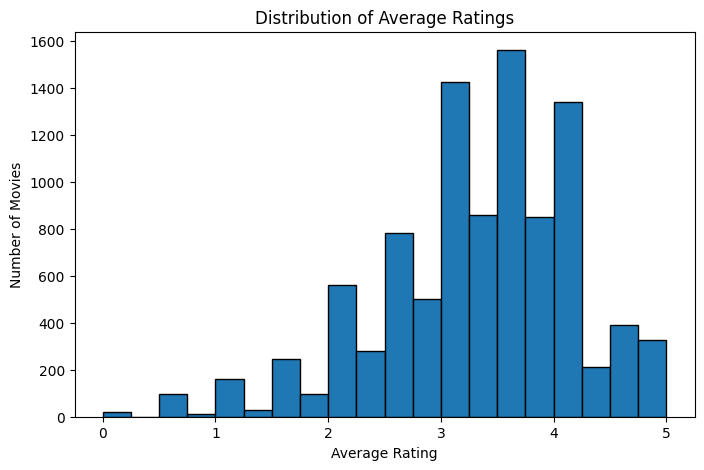

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['avg_rating'], bins=20, edgecolor='black')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()



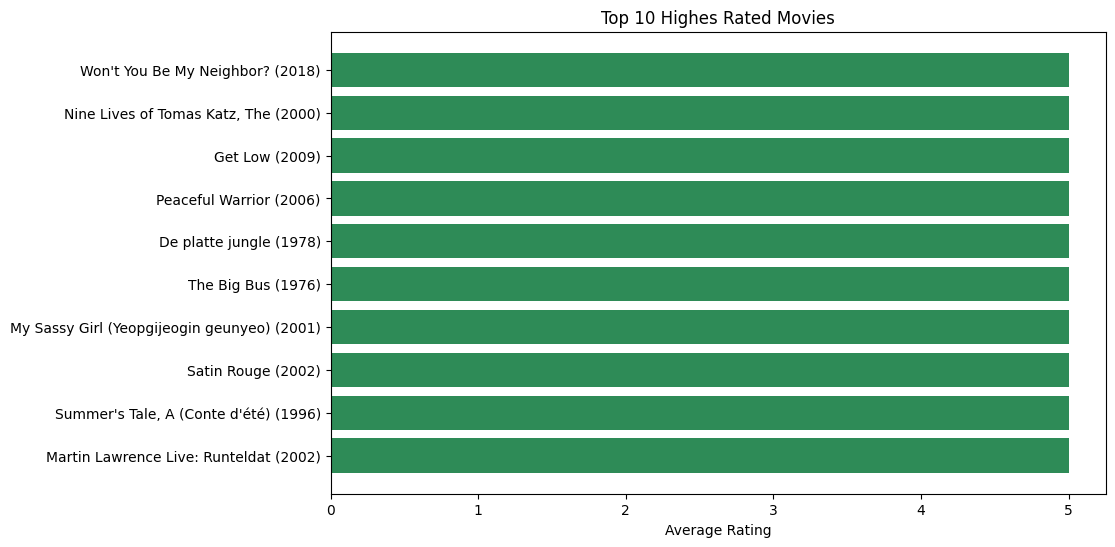

In [ ]:
top_movies = df.sort_values(by='avg_rating', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_movies['title'], top_movies['avg_rating'], color='seagreen')
plt.xlabel('Average Rating')
plt.title('Top 10 Highes Rated Movies')
plt.gca().invert_yaxis()
plt.show()


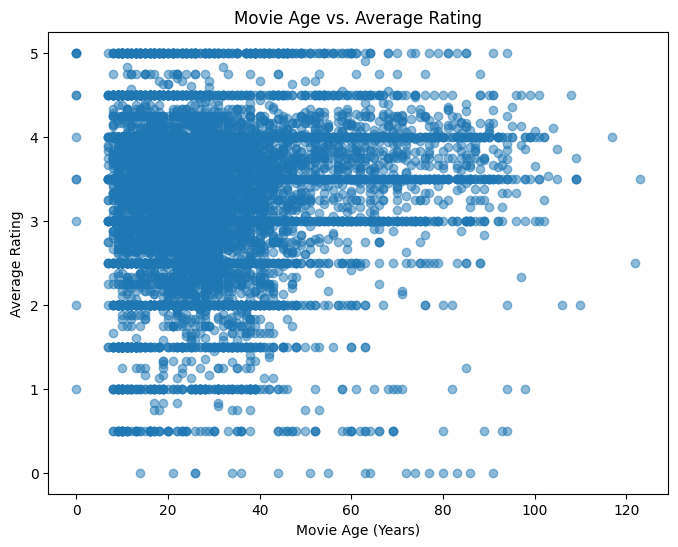

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['movie_age'], df['avg_rating'], alpha=0.5)
plt.title('Movie Age vs. Average Rating')
plt.xlabel('Movie Age (Years)')
plt.ylabel('Average Rating')
plt.show()


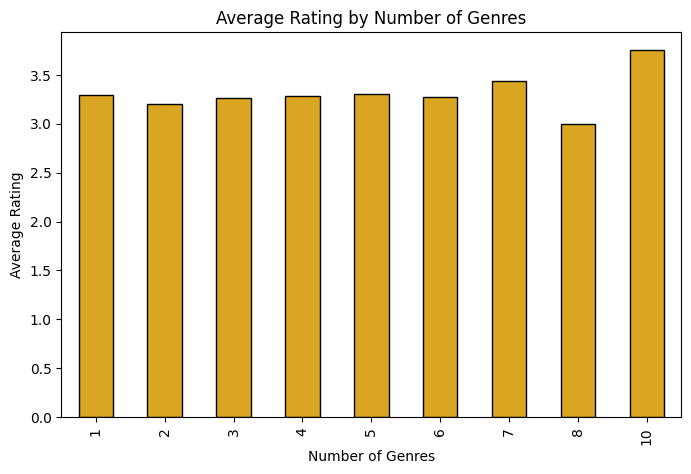

In [ ]:
genres_rating = df.groupby('num_genres')['avg_rating'].mean()
plt.figure(figsize=(8,5))
genres_rating.plot(kind='bar', color='goldenrod', edgecolor='black')
plt.title('Average Rating by Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Average Rating')
plt.show()


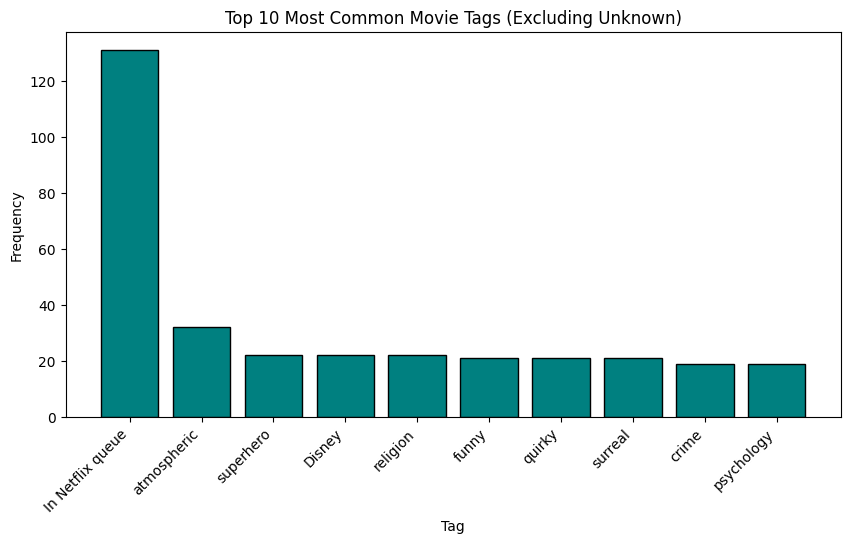

In [ ]:
from collections import Counter
all_tags = ', '.join(df['tag'].dropna()).split(', ')
clean_tags = [tag for tag in all_tags if tag.strip().lower() != 'unknown' and tag.strip() != '']
tag_counts = Counter(clean_tags)
top_tags = dict(tag_counts.most_common(10))
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(top_tags.keys(), top_tags.values(), color='teal', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Common Movie Tags (Excluding Unknown)')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.show()


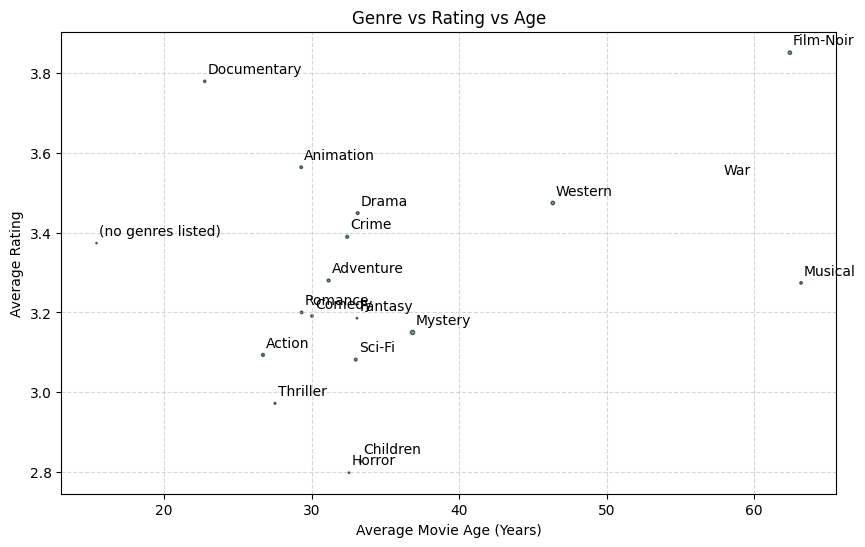

In [19]:
genre_summary = df.groupby('main_genre').agg({
    'avg_rating': 'mean',
    'movie_age': 'mean',
    'N0_of_tags': 'mean'
}).reset_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(
    genre_summary['movie_age'],
    genre_summary['avg_rating'],
    s=genre_summary['N0_of_tags'] * 10,   # bubble size = average tag count
    alpha=0.6,
    color='teal',
    edgecolor='black'
)

for i, txt in enumerate(genre_summary['main_genre']):
    plt.annotate(txt, (genre_summary['movie_age'][i]+0.2, genre_summary['avg_rating'][i]+0.02))

plt.title('Genre vs Rating vs Age')
plt.xlabel('Average Movie Age (Years)')
plt.ylabel('Average Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


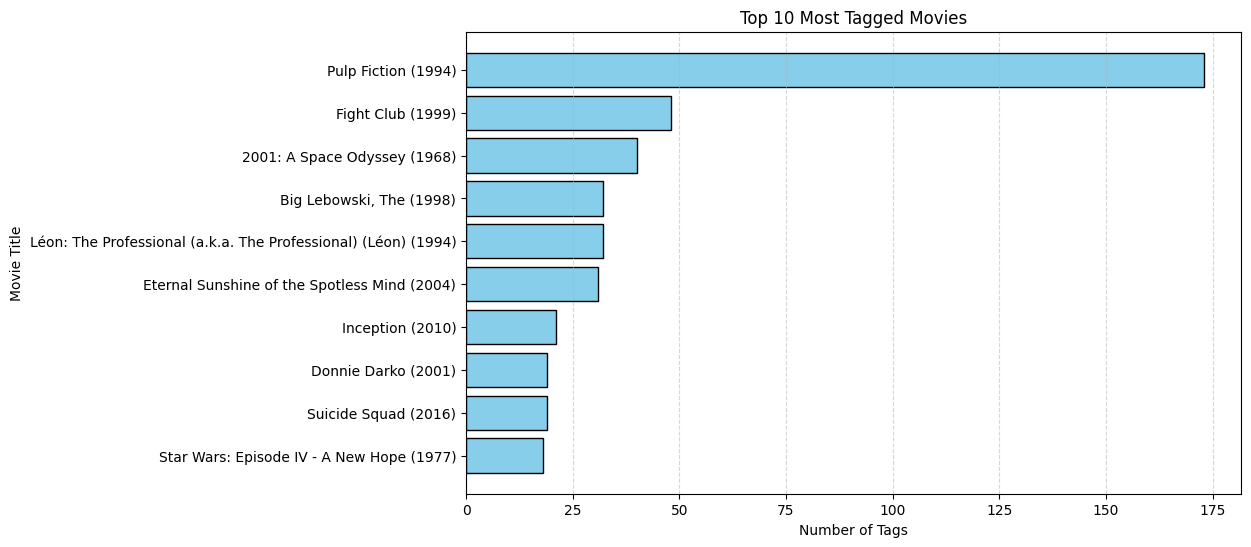

In [20]:
top_tagged = df.sort_values(by='N0_of_tags', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_tagged['title'], top_tagged['N0_of_tags'], color='skyblue', edgecolor='black')
plt.xlabel('Number of Tags')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Tagged Movies')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [1]:
!jupyter nbconvert --to html "Stage1_Lawal_Mayowa_Feature_Engineering_Exploration.ipynb"

[NbConvertApp] Converting notebook Stage1_Lawal_Mayowa_Feature_Engineering_Exploration.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 767290 bytes to Stage1_Lawal_Mayowa_Feature_Engineering_Exploration.html
